# data/mc plots

### Post-process Data and MC samples

- Sum all MC samples that belong to the same process
- Scale the number of events by the total sum of weights

In [2]:
# import utilities for post-process
import utils
import plotting

In [3]:
samples = {
    "qcd": [
        "QCD_PT-120to170",
        "QCD_PT-170to300",
        "QCD_PT-470to600",
        "QCD_PT-600to800",
        "QCD_PT-800to1000",
        "QCD_PT-1000to1400",
        "QCD_PT-1400to1800",
        "QCD_PT-1800to2400",
        # "QCD_PT-2400to3200", # wrongly processed file
        "QCD_PT-3200",
    ],
    "data": [
        "Run2022F",
        "Run2022G",
    ],
    "ttbar": [
        # "TTtoLNu2Q",
        "TTto4Q",
        "TTto2L2Nu",
    ],
    "gghtobb": [
        "GluGluHto2B_PT-200_M-125",
    ],
    "vbfhtobb": [
        "VBFHto2B_M-125_dipoleRecoilOn",
    ],
    "vhtobb": [
        "WplusH_Hto2B_Wto2Q_M-125",
        "WplusH_Hto2B_WtoLNu_M-125",
        "WminusH_Hto2B_Wto2Q_M-125",
        "WminusH_Hto2B_WtoLNu_M-125",
        "ZH_Hto2B_Zto2Q_M-125",
        "ggZH_Hto2B_Zto2Q_M-125",
        "ggZH_Hto2B_Zto2L_M-125",
        "ggZH_Hto2B_Zto2Nu_M-125",
    ],
    "tthtobb": [
        "ttHto2B_M-125",
    ],
    "diboson": [
        "ZZ",
        "WW",
        "WZ",
    ],
    "vjets": [
        "Wto2Q-3Jets_HT-200to400",
        "Wto2Q-3Jets_HT-400to600",
        "Wto2Q-3Jets_HT-600to800",
        "Wto2Q-3Jets_HT-800",
        "Zto2Q-4Jets_HT-200to400",
        "Zto2Q-4Jets_HT-400to600",
        "Zto2Q-4Jets_HT-600to800",
        "Zto2Q-4Jets_HT-800",
        ],
    }

In [4]:
# define dictionary with directories of files (this can be configured in a yaml file later in the script)

# this is the directory to the files
path_to_dir = "/eos/uscms/store/user/cmantill/bbbb/skimmer/Sep19"
dirs = {path_to_dir: samples}
year = "2022EE"

In [5]:
# filters are sequences of strings that can be used to place a selection or mask in the parquet files                                                                                                                                                                              
# e.g. https://github.com/rkansal47/HHbbVV/blob/main/src/HHbbVV/postprocessing/postprocessing.py#L80                                                                                                                                                  
filters = [
    [
        ("('ak8FatJetPt', '0')", ">=", 300),
        ("('ak8FatJetPt', '1')", ">=", 250),
        ("('ak8FatJetMsd', '0')", ">=", 60),
        ("('ak8FatJetMsd', '1')", ">=", 60),                                                                                                                                                                                                 
    ],
]

In [6]:
# columns to load                                                                                                                                                                                                                                     
# the parquet files are too big so we can only load a few columns at a time without consumming much memory
load_columns = [
    ("weight", 1),
    ("DijetMass", 1),
	("ak8FatJetPt", 2),
	("ak8FatJetPNetXbb", 2),                                                                                                                                                                                                                     
]
# reformat into ("column name", "idx") format for reading multiindex columns                                                                                                                                                                          
columns = []
for key, num_columns in load_columns:
    for i in range(num_columns):
        columns.append(f"('{key}', '{i}')")

In [7]:
# dictionary that will contain all information (from all samples)

events_dict = {}
for input_dir, samples in dirs.items():
    events_dict = {
        **events_dict,
        # this function will load files (only the columns selected), apply filters and compute a weight per event
        **utils.load_samples(input_dir, samples, year, filters, columns)
	}

Loading QCD_PT-1000to1400
/eos/uscms/store/user/cmantill/bbbb/skimmer/Sep19/2022EE/QCD_PT-1000to1400/parquet
Loading QCD_PT-120to170
/eos/uscms/store/user/cmantill/bbbb/skimmer/Sep19/2022EE/QCD_PT-120to170/parquet
Loading QCD_PT-1400to1800
/eos/uscms/store/user/cmantill/bbbb/skimmer/Sep19/2022EE/QCD_PT-1400to1800/parquet
Loading QCD_PT-170to300
/eos/uscms/store/user/cmantill/bbbb/skimmer/Sep19/2022EE/QCD_PT-170to300/parquet
Loading QCD_PT-1800to2400
/eos/uscms/store/user/cmantill/bbbb/skimmer/Sep19/2022EE/QCD_PT-1800to2400/parquet
Loading QCD_PT-3200
/eos/uscms/store/user/cmantill/bbbb/skimmer/Sep19/2022EE/QCD_PT-3200/parquet
Loading QCD_PT-470to600
/eos/uscms/store/user/cmantill/bbbb/skimmer/Sep19/2022EE/QCD_PT-470to600/parquet
Loading QCD_PT-600to800
/eos/uscms/store/user/cmantill/bbbb/skimmer/Sep19/2022EE/QCD_PT-600to800/parquet
Loading QCD_PT-800to1000
/eos/uscms/store/user/cmantill/bbbb/skimmer/Sep19/2022EE/QCD_PT-800to1000/parquet
Loading Run2022F
/eos/uscms/store/user/cmantill/b

Loading Wto2Q-3Jets_HT-400to600
/eos/uscms/store/user/cmantill/bbbb/skimmer/Sep19/2022EE/Wto2Q-3Jets_HT-400to600/parquet


Loading Wto2Q-3Jets_HT-800
/eos/uscms/store/user/cmantill/bbbb/skimmer/Sep19/2022EE/Wto2Q-3Jets_HT-800/parquet
Loading Zto2Q-4Jets_HT-200to400
/eos/uscms/store/user/cmantill/bbbb/skimmer/Sep19/2022EE/Zto2Q-4Jets_HT-200to400/parquet
Loading Zto2Q-4Jets_HT-400to600
/eos/uscms/store/user/cmantill/bbbb/skimmer/Sep19/2022EE/Zto2Q-4Jets_HT-400to600/parquet
Loading Zto2Q-4Jets_HT-600to800
/eos/uscms/store/user/cmantill/bbbb/skimmer/Sep19/2022EE/Zto2Q-4Jets_HT-600to800/parquet
Loading Zto2Q-4Jets_HT-800
/eos/uscms/store/user/cmantill/bbbb/skimmer/Sep19/2022EE/Zto2Q-4Jets_HT-800/parquet


In [8]:
# this will be the weight that will be stored in the eventsDict once the utils.loadSamples function is done
weight_key = ["finalWeight"]

In [9]:
samples_loaded = list(events_dict.keys())
keys_loaded = list(events_dict[samples_loaded[0]].keys())
print(f"Keys in events_dict {keys_loaded}")  

Keys in events_dict [('weight', 0), ('DijetMass', 0), ('ak8FatJetPt', 0), ('ak8FatJetPt', 1), ('ak8FatJetPNetXbb', 0), ('ak8FatJetPNetXbb', 1), ('weight_nonorm', ''), ('finalWeight', '')]


In [10]:
samples_to_fill = [
    "data",
    "qcd",
    # TASK: ADD HERE OTHER SAMPLE keys to plot
    "ttbar",
    "gghtobb",
    "vbfhtobb",
    "vhtobb",
    "tthtobb",
    "diboson",
    "vjets",
]
vars_to_plot = [
    "ak8FatJetPt0",
    "ak8FatJetPt1",
    "DijetMass",
    "ak8FatJetPNetXbb0",
]

In [11]:
# define ShapeVar (label and bins for a given variable)                                                                                                                                                                                                   
from utils import ShapeVar

var_to_shapevar = {
    # var must match key in events dictionary (i.e. as saved in parquet file)                                                                                                                                                                             
    "DijetMass": ShapeVar(
        var="DijetMass", label=r"$m^{jj}$ (GeV)", bins=[30, 600, 4000]
    ),
    "ak8FatJetPt0": ShapeVar(
        var="ak8FatJetPt0", label=r"$p_T^0$ (GeV)", bins=[30, 300, 1500], significance_dir="right"
    ),
    "ak8FatJetPt1": ShapeVar(
        var="ak8FatJetPt1", label=r"$p_T^1$ (GeV)", bins=[30, 300, 1500], significance_dir="right"
    ),
    "ak8FatJetPNetMass0": ShapeVar(
        var="ak8FatJetPNetMass0", label=r"$m_{reg}^{0}$ (GeV)", bins=[20, 50, 250]
    ),
    "ak8FatJetPNetXbb0": ShapeVar(
        var="ak8FatJetPNetXbb0", label=r"$TX_{bb}^{0}$", bins=[50, 0., 1],
    ),
}

In [12]:
# make a histogram                                                                                                                                                                                                                                
hists = {}
for var in vars_to_plot:
    shape_var = var_to_shapevar[var]
    if shape_var.var not in hists:
        hists[shape_var.var] = utils.singleVarHist(
            events_dict,
            shape_var,
            weight_key=weight_key,
            selection=None,
        )


Will plot ak8FatJetPt0 histogram
{'Multijet': 5879051.953212592, '$t\\bar{t}$+jets': 180235.6709572357, 'ggH(bb)': 424.80695807980584, 'VBFH(bb)': 48.94421972447554, 'VH(bb)': 237.44616633269573, 'ttH(bb)': 492.0163890781262, 'VV': 3996.9454292641803, 'W/Z$(qq)$': 0.33968503613759604}
Will plot ak8FatJetPt1 histogram
{'Multijet': 5879051.953212592, '$t\\bar{t}$+jets': 180235.6709572357, 'ggH(bb)': 424.80695807980584, 'VBFH(bb)': 48.94421972447554, 'VH(bb)': 237.44616633269573, 'ttH(bb)': 492.0163890781262, 'VV': 3996.9454292641803, 'W/Z$(qq)$': 0.33968503613759604}
Will plot DijetMass histogram
{'Multijet': 5879051.953212592, '$t\\bar{t}$+jets': 180235.6709572357, 'ggH(bb)': 424.80695807980584, 'VBFH(bb)': 48.94421972447554, 'VH(bb)': 237.44616633269573, 'ttH(bb)': 492.0163890781262, 'VV': 3996.9454292641803, 'W/Z$(qq)$': 0.33968503613759604}
Will plot ak8FatJetPNetXbb0 histogram
{'Multijet': 5879051.953212592, '$t\\bar{t}$+jets': 180235.6709572357, 'ggH(bb)': 424.80695807980584, 'VBFH

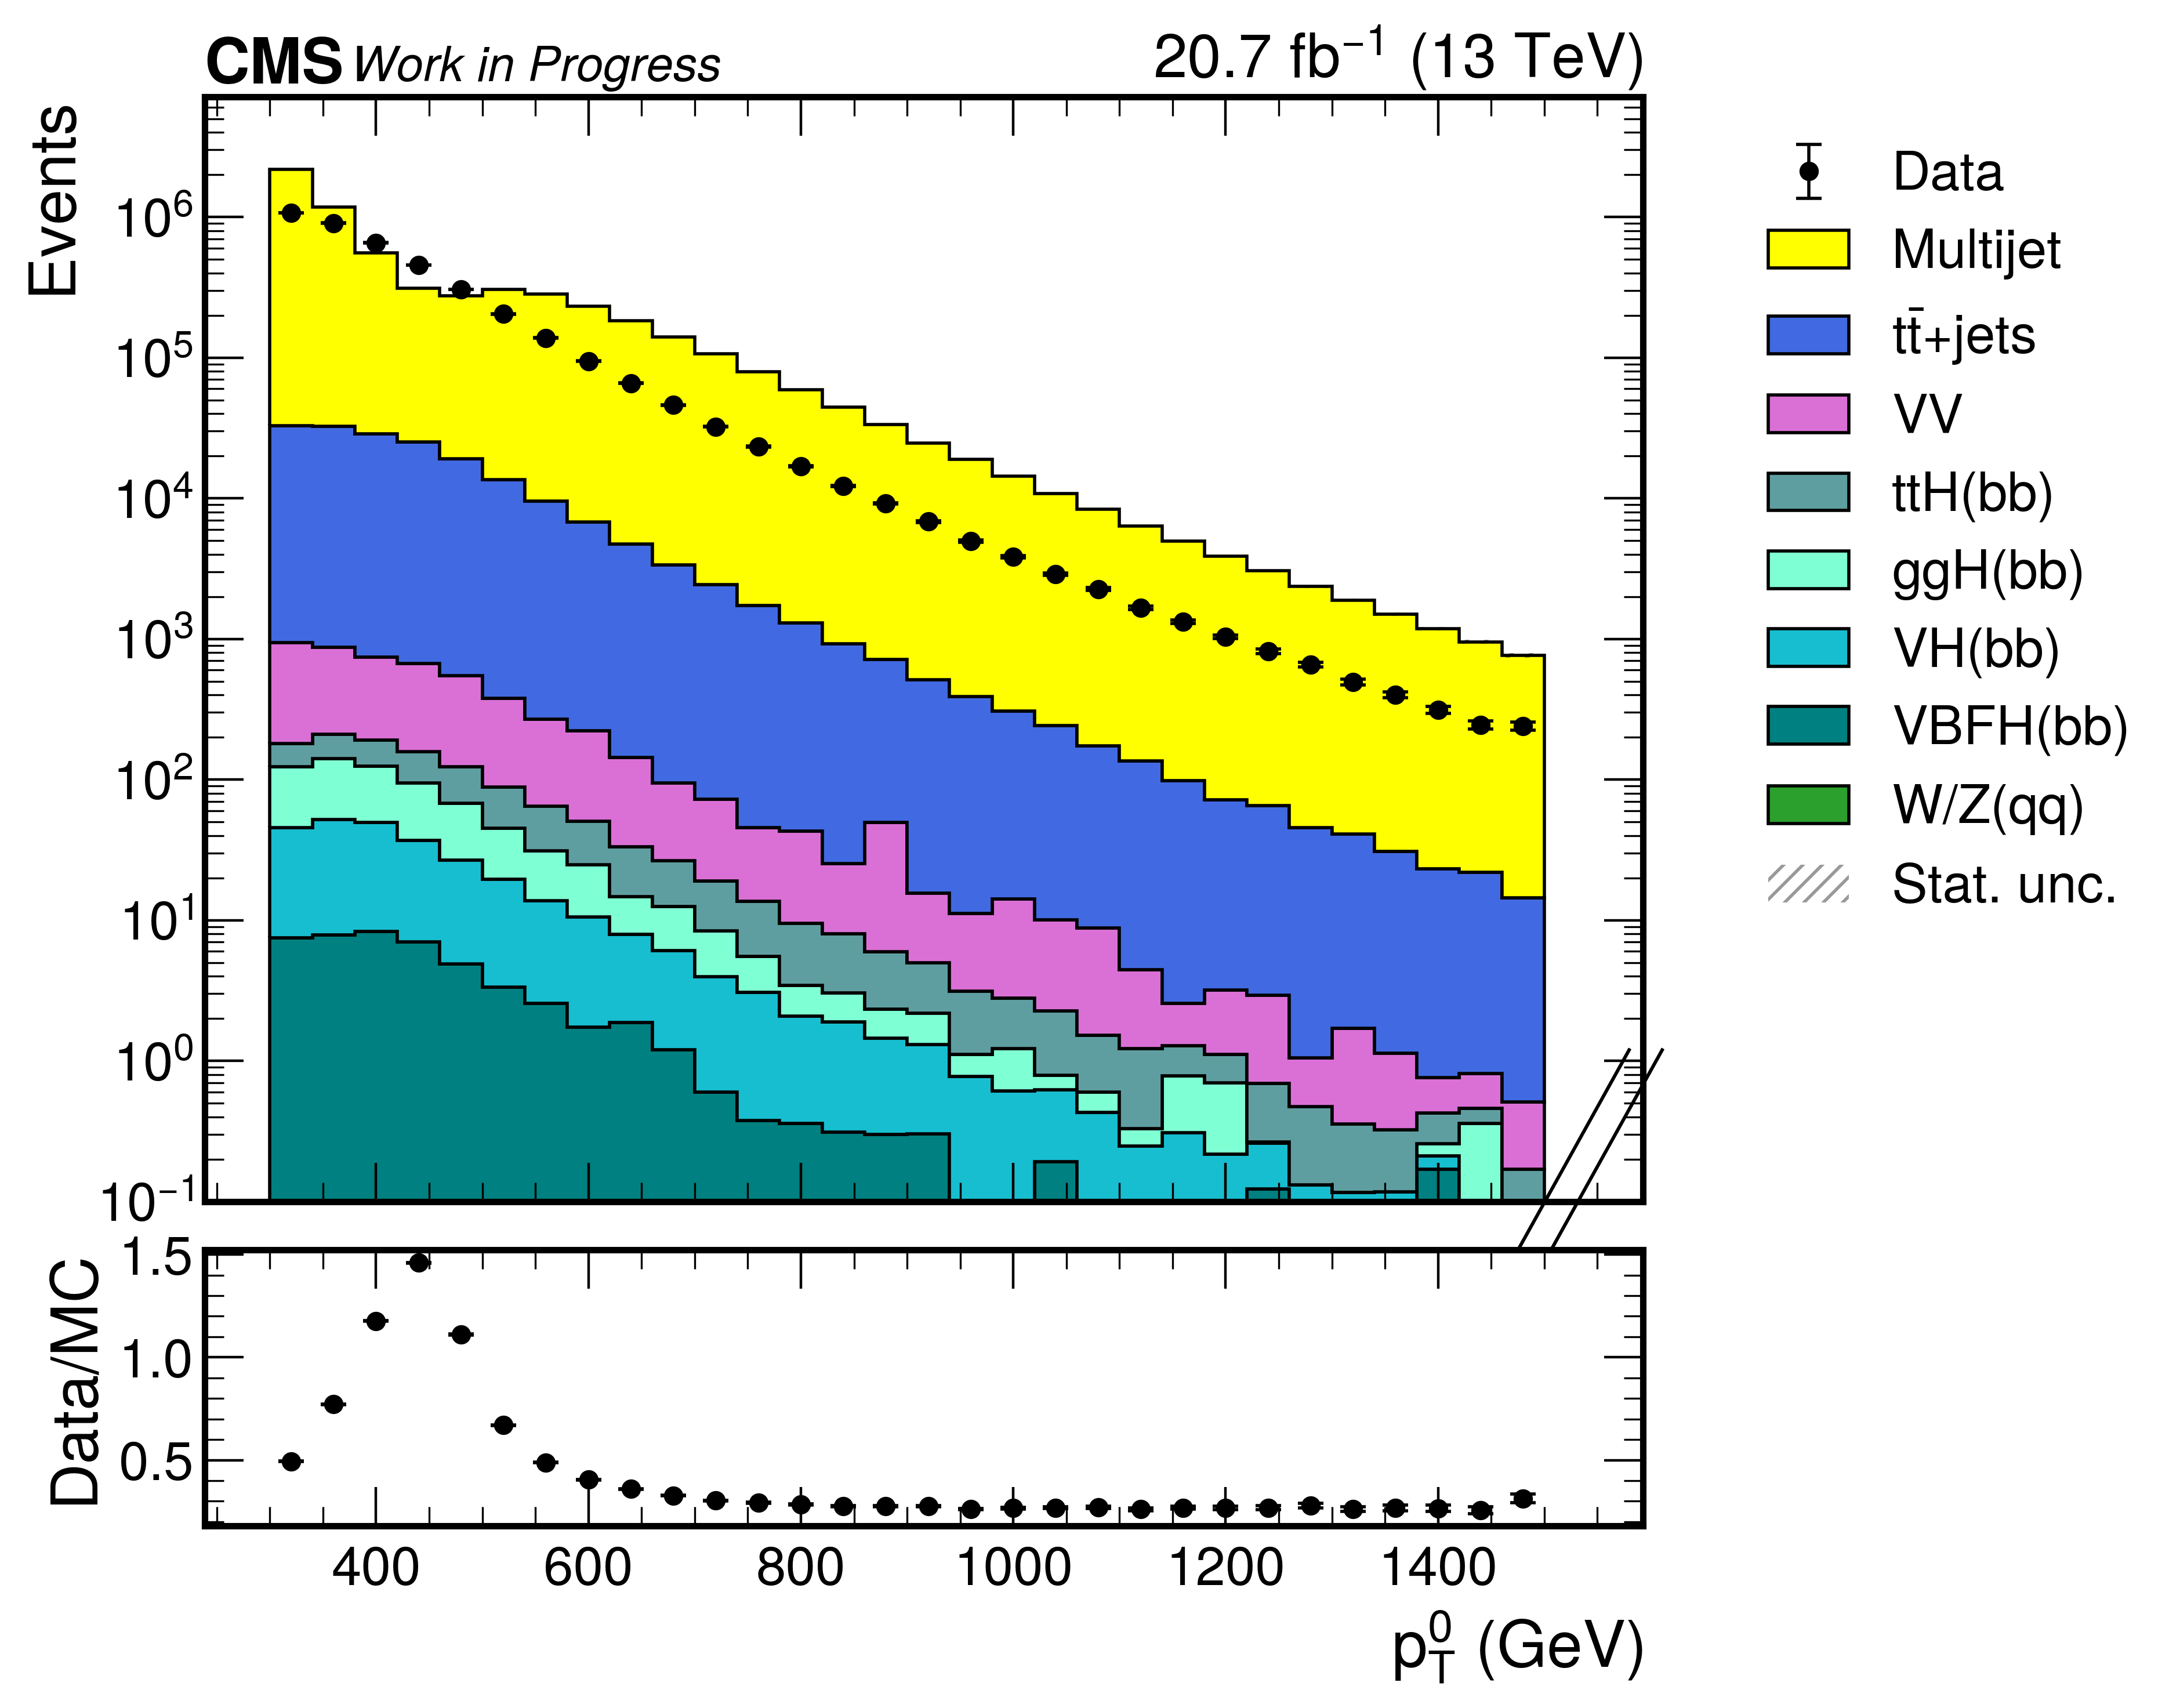

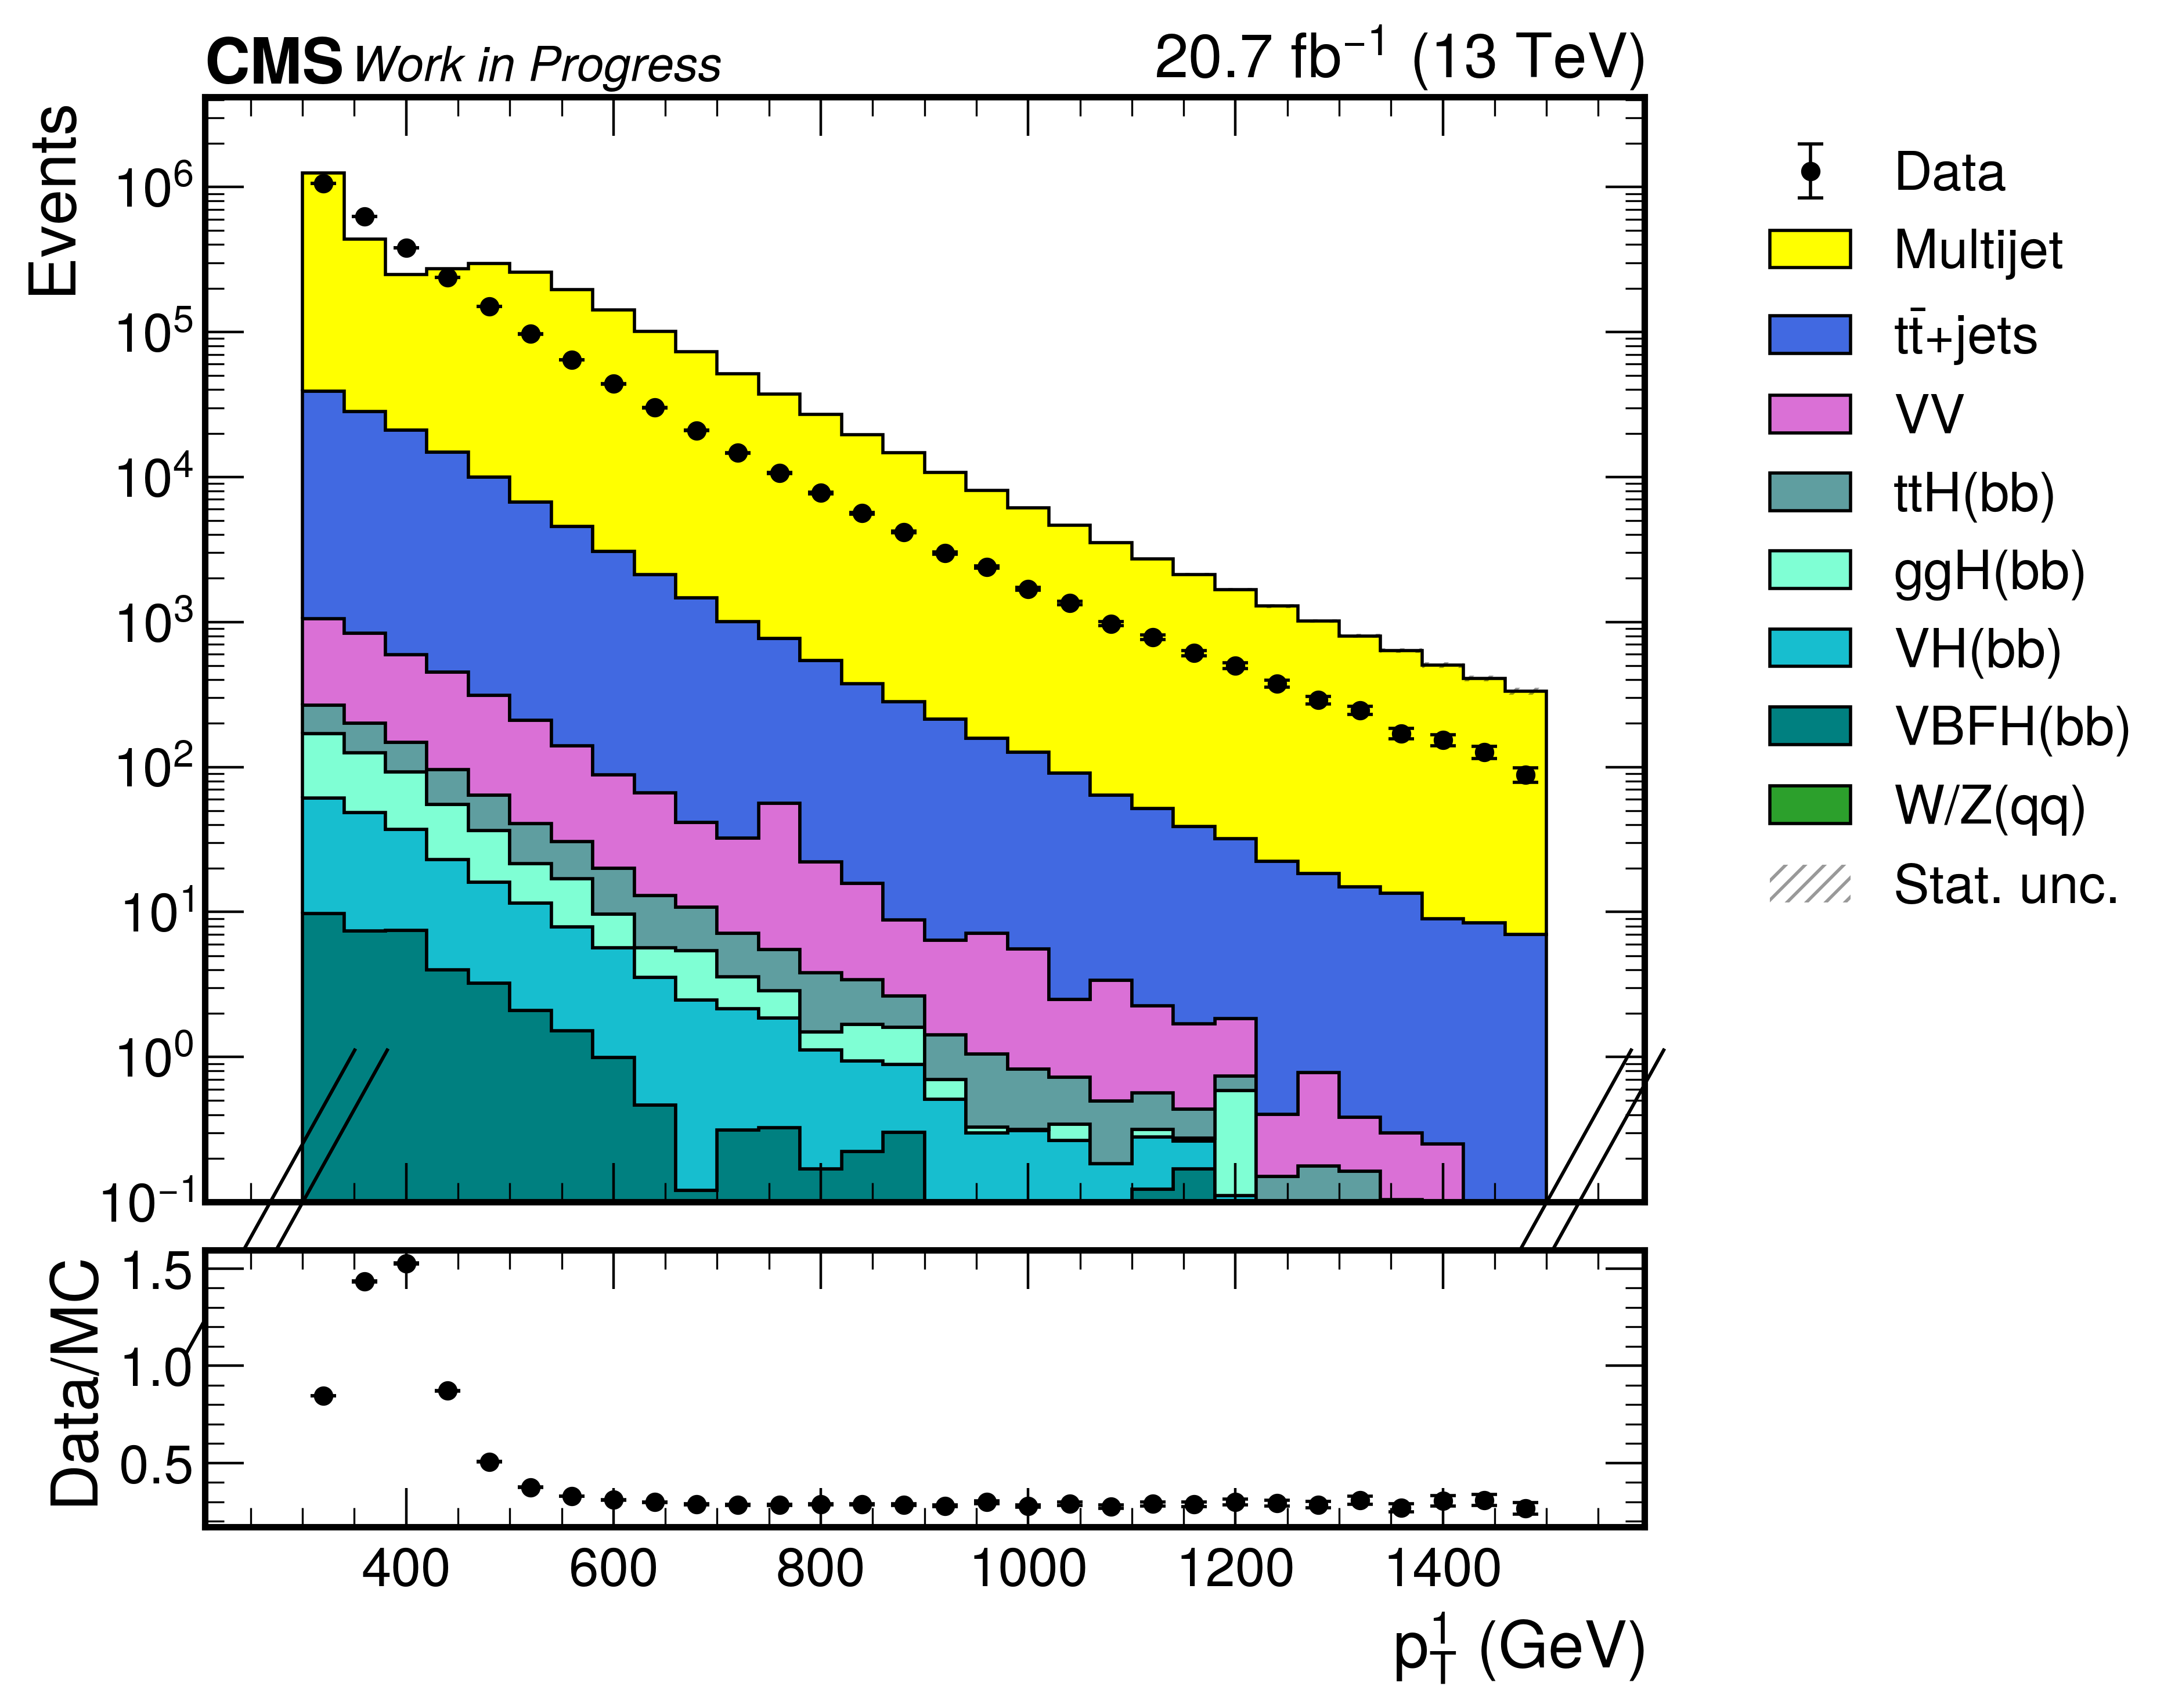

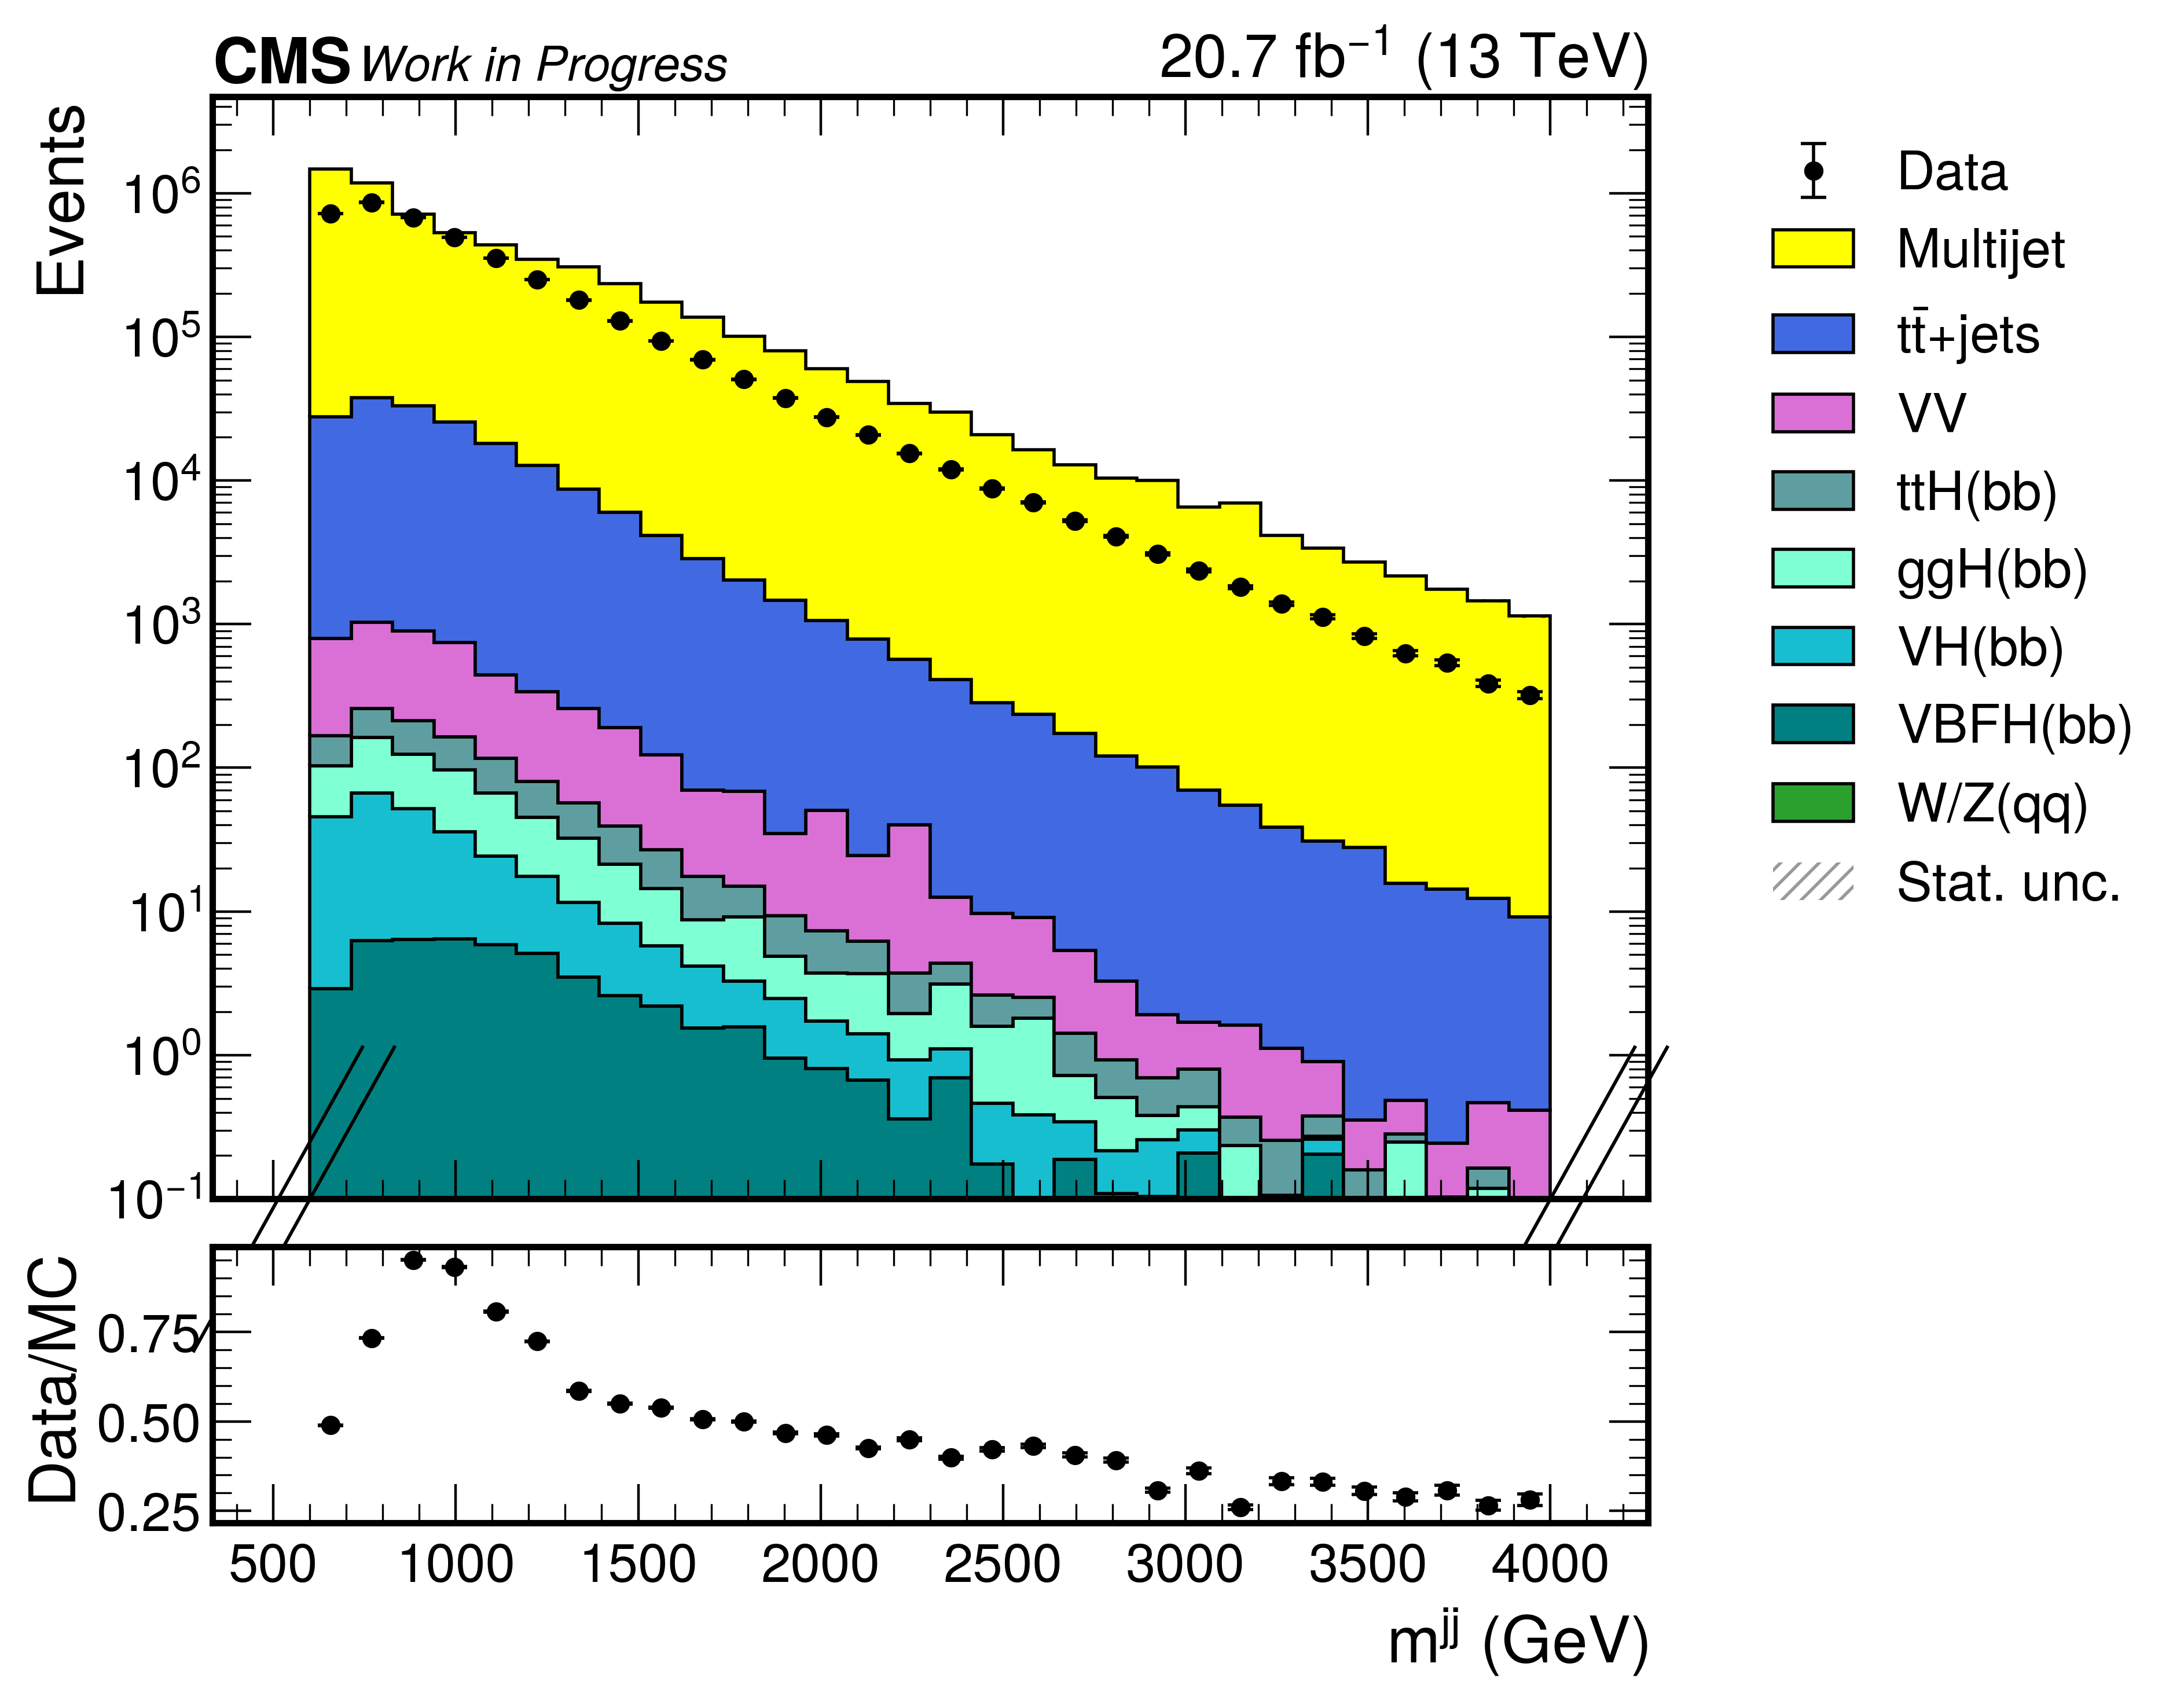

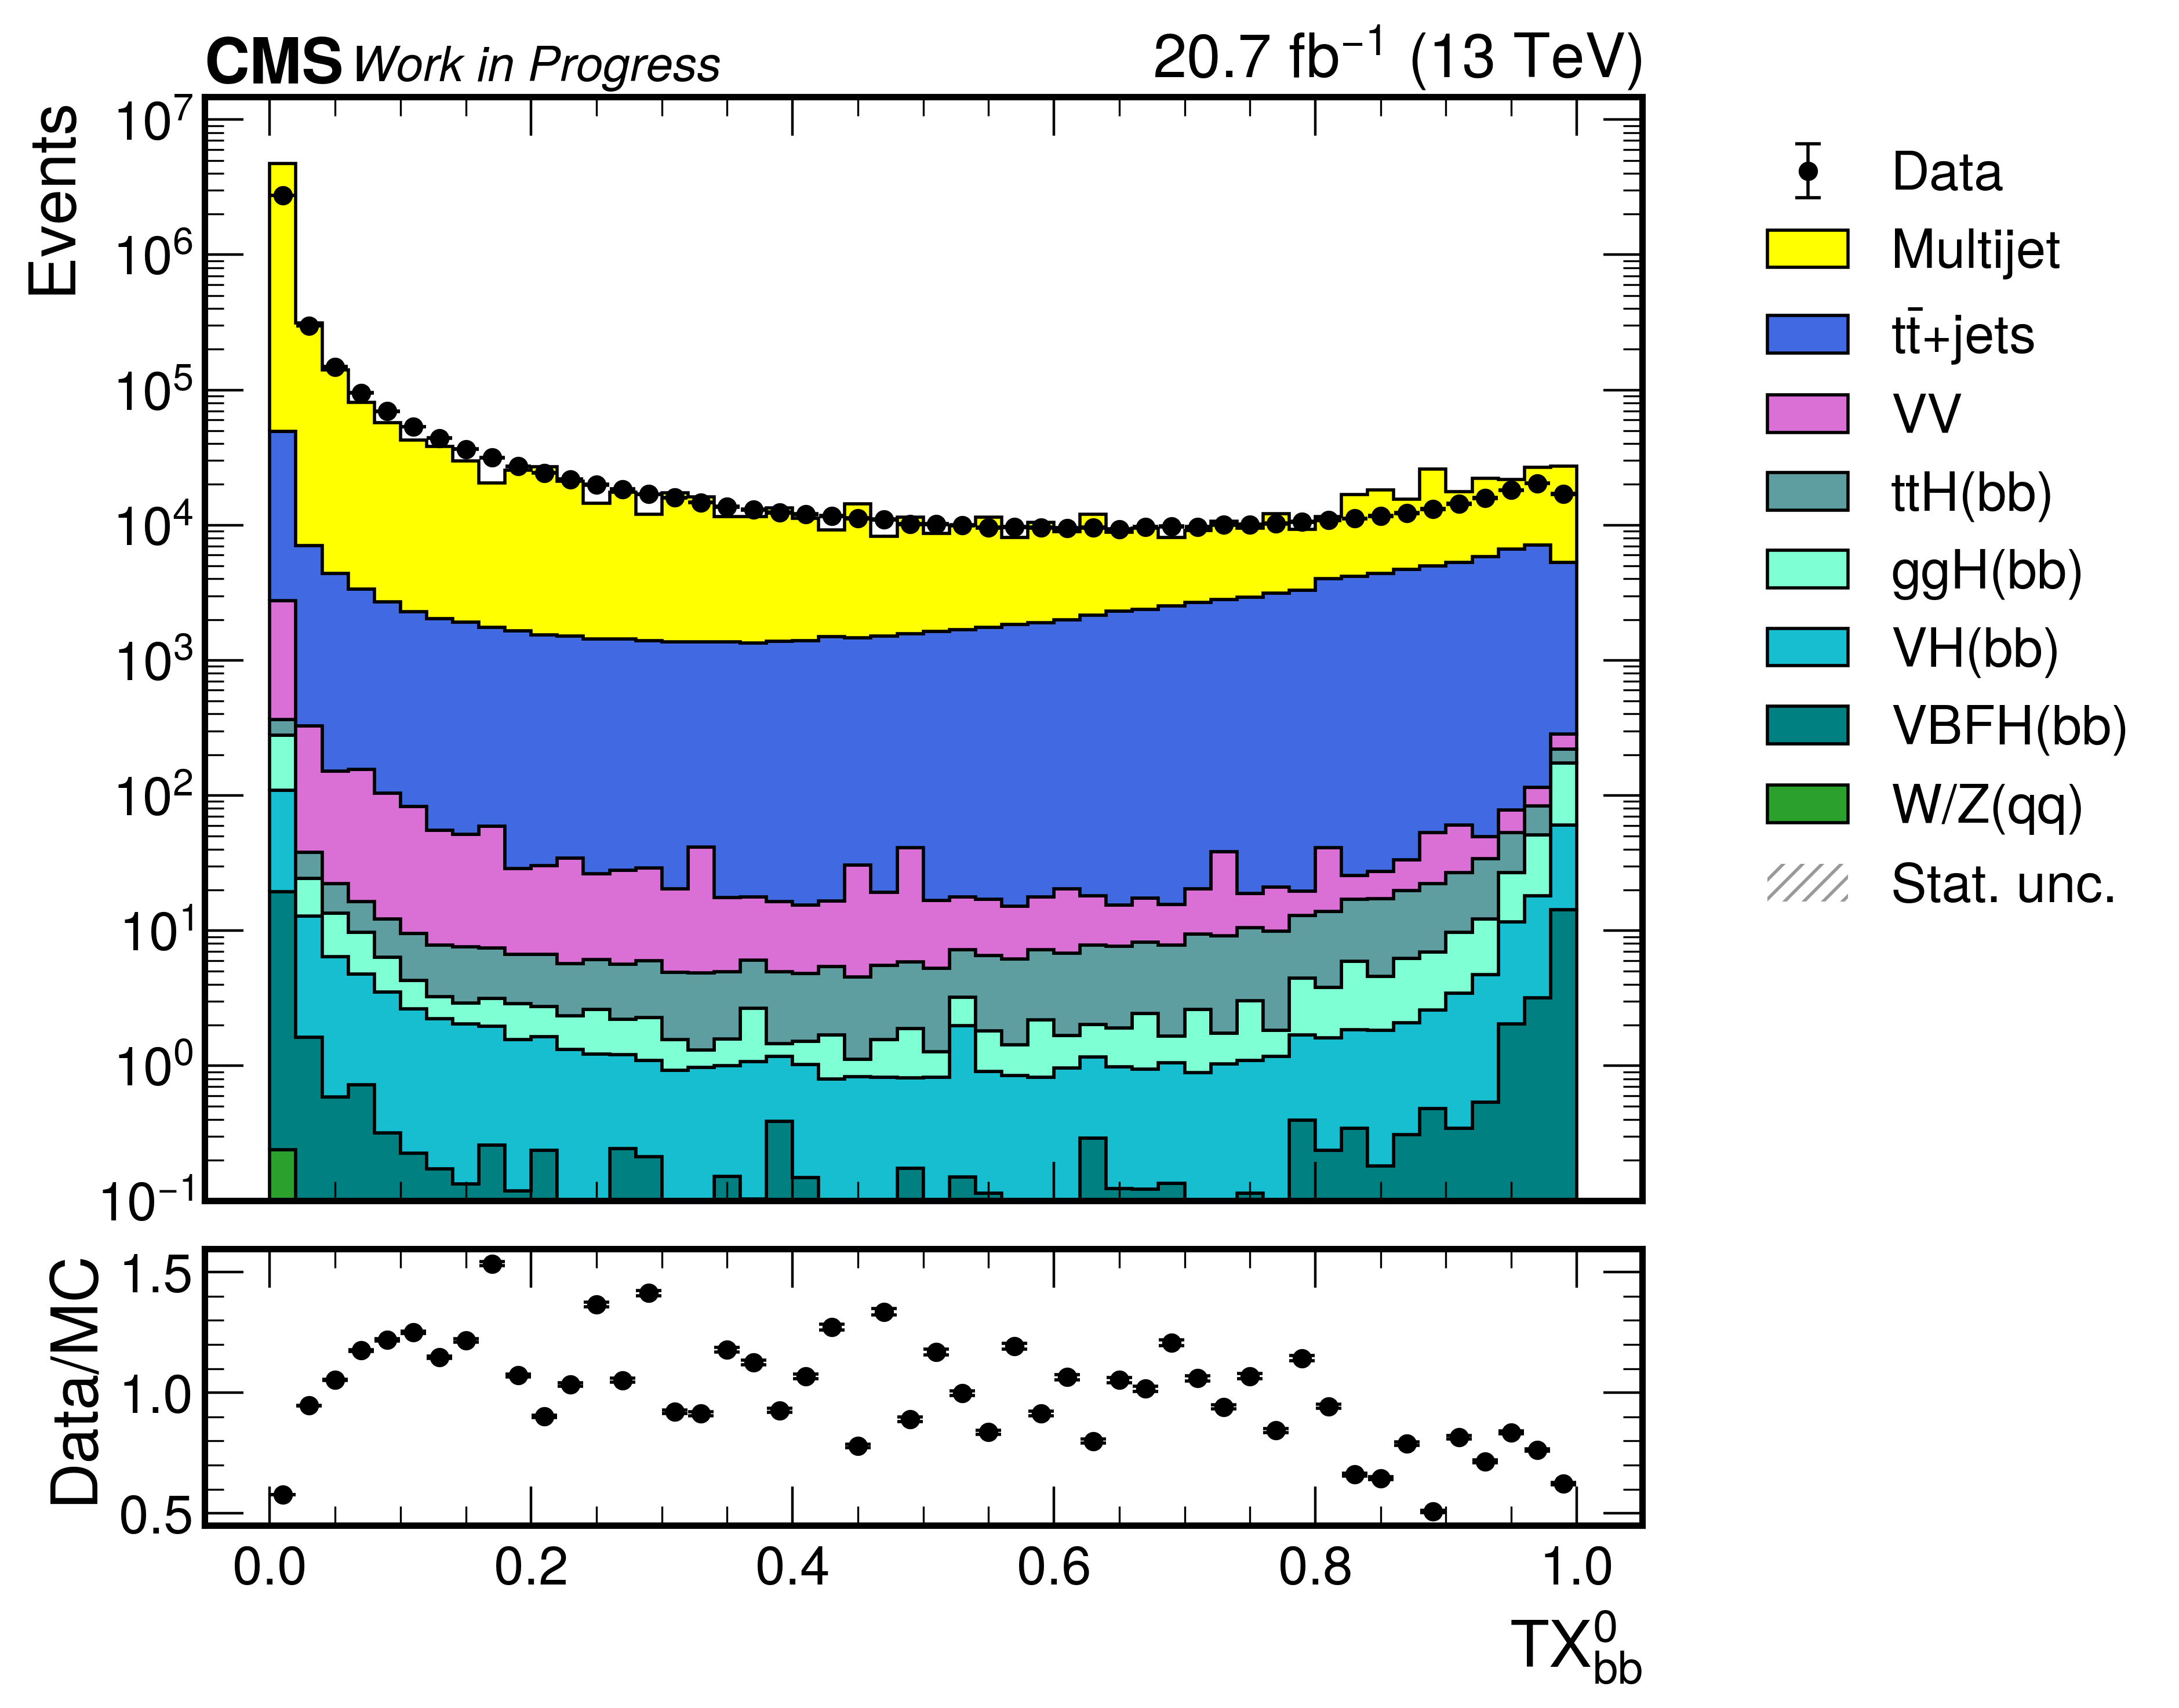

In [14]:
 # make a stacked plot                                                                                                                                                                                                                             
for var in vars_to_plot:
    plotting.plot_hists(
        year,
        hists,
        [var],
    )


